In [473]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv("Data/Titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [475]:
df_raw = df.copy()

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [477]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [478]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [479]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# 결측치 처리

In [480]:
df['Cabin'] = df['Cabin'].fillna('N')
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna('N')

In [481]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 필요 없는 칼럼 삭제
이름, 티켓 넘버, 승객Id는 제거

- 이름을 통해 결혼 유무 등을 알 수 있으니 사용 가능할 듯

In [482]:
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

# 범주형 데이터

In [483]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
le_cabin = LabelEncoder()
le_embarked = LabelEncoder()

# df['Sex_encoder'] = le_gender.fit_transform(df['Sex'])
# df['Cabin_encoder'] = le_gender.fit_transform(df['Cabin'])
# df['Embarked_encoder'] = le_gender.fit_transform(df['Embarked'])
# df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

features = ['Sex', 'Cabin', 'Embarked']
for feature in features:
    le = LabelEncoder()
    le_result = le.fit(df[feature])
    df[feature] = le_result.transform(df[feature])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,3
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,146,3
3,1,1,0,35.0,1,0,53.1000,55,3
4,0,3,1,35.0,0,0,8.0500,146,3


In [485]:
from sklearn.preprocessing import LabelEncoder

def labelEncoder(df, features):
    for feature in features:
        le = LabelEncoder()
        le_result = le.fit(df[feature])
        df[feature] = le.fit(df[feature])

# 이상치 제거

In [486]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,129.974186,2.343434
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,35.677211,1.167398
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,146.000000,2.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,146.000000,3.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,146.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000,3.000000


In [487]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_boxplot(df, columns) :
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df[columns])
    plt.show()

In [488]:
def remove_iqr_same(df, columns):
    df_clean = df.copy()

    ranges = []
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        ranges.append((lower, upper))
    
    for index, col in enumerate(columns):
        lower, upper = ranges[index]
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        # df_clean = df_clean[~((df_clean['col'] < lower) | (df_clean['col'] > upper))]

    return df_clean

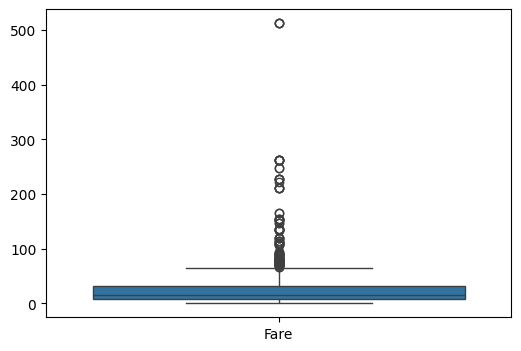

In [489]:
draw_boxplot(df, ['Fare'])

In [490]:
# df = remove_iqr_same(df, ['Fare'])

# 정답 데이터의 불균형 확인

데이터 불균형이 있어도 확인이 안되기 때문에
해당 부분을 분석하지 않음

# 각 칼럼별 정답 데이터와 상관관계 분석

<Axes: xlabel='Sex', ylabel='Survived'>

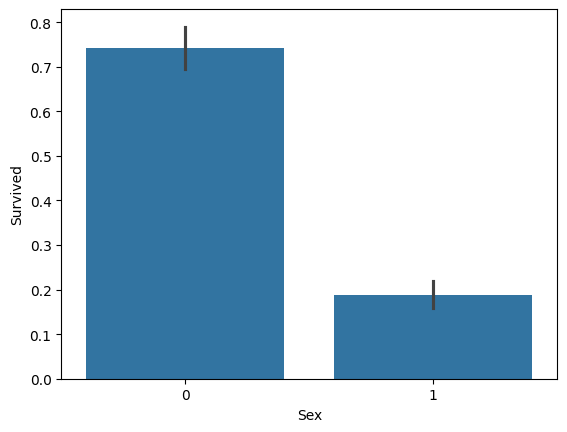

In [491]:
sns.barplot(x='Sex', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

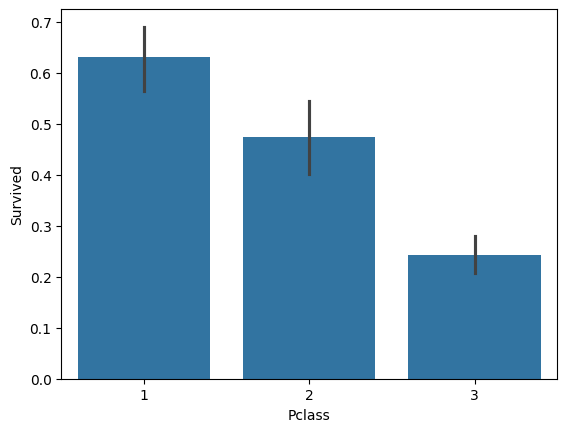

In [492]:
sns.barplot(x='Pclass', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

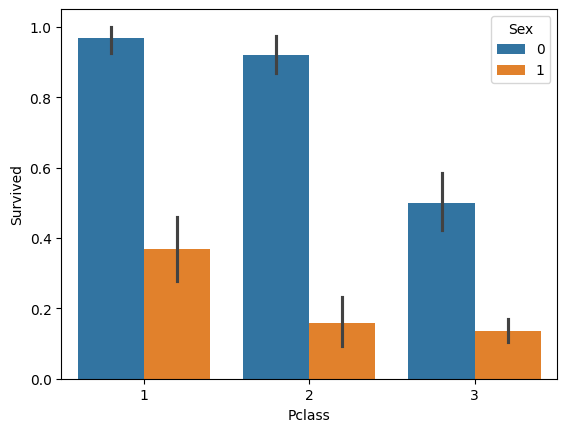

In [493]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

<Axes: xlabel='Embarked', ylabel='Survived'>

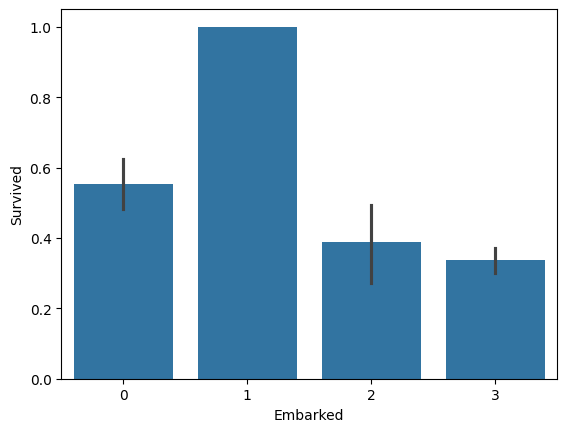

In [494]:
sns.barplot(x='Embarked', y='Survived', data=df)

# 스케일링

In [495]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,129.974186,2.343434
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,35.677211,1.167398
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,146.000000,2.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,146.000000,3.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,146.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000,3.000000


In [496]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X = df.drop('Survived', axis=1)
X = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.449441,0.562734
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.373473,-2.008526
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.449441,0.562734
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,-2.102639,0.562734
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.449441,0.562734


# 데이터 분할 (Training/Test)

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(712, 8)
(179, 8)
(712,)
(179,)
Counter({0: 439, 1: 273})
Counter({0: 110, 1: 69})


# 분류 모델 학습 및 평가

여러 개의 모델을 동시에 학습시켜, 가장 좋은 모델을 선택한다

In [498]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # 회기 모델 중 > 이진 분류 모델
from sklearn.metrics import accuracy_score

In [499]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

In [527]:
dt_model.fit(X_train, y_train)
dt_result = dt_model.predict(X_test)
accuracy_score(dt_result, y_test)

0.7597765363128491

In [519]:
rf_model.fit(X_train, y_train)
rf_result = rf_model.predict(X_test)
accuracy_score(rf_result, y_test)

0.7988826815642458

In [508]:
lr_model.fit(X_train, y_train)
lr_result = lr_model.predict(X_test)
accuracy_score(lr_result, y_test)

0.8100558659217877